<a href="https://colab.research.google.com/github/Priyo-prog/Deep-Learning-with-Tensorflow/blob/main/Neural%20Network%20Regression%20with%20Tensorflow/neural_network_regression_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Neural Network

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## Create Data to View and Fit

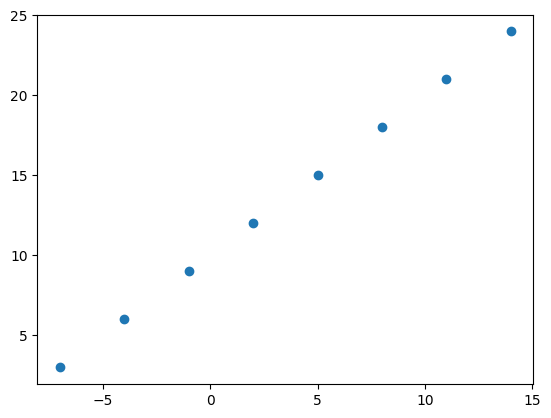

In [2]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

## Input and output shapes

In [3]:
# create a demo tensor for our house prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_price = tf.cast(house_price, dtype=tf.float32)

In [4]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In the above case input shape and output shape is coming blank because they are tensors of rank 0, that means it has no dimension or 0 dimension

In [5]:
X[0].ndim

0

One of the most common error in deep learning is input and output shape

## Turn Numpy Arrays To Tensors

In [6]:
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [7]:
X[0].shape, y[0].shape

(TensorShape([]), TensorShape([]))

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling the tensorflow
1. **Creating a model** - Define the input and output layers, as well as the hidden layers in the deep learning model
2. **Compiling a model** - Define the `loss function` (in other words, the function which tells us our model how wrong it is) and the `optimizer` ( tells our model how to improve the pattern its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - Letting the model try to find patterns between X & y(features and labels)

In [9]:
# Seta random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model (BOTH works tf.expand_dims() function as well as X[..., newaxis])
# model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)
model.fit(X[..., tf.newaxis], y, epochs=5)

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 14.0656 - mae: 14.0656
Epoch 2/5
1/1 [==============================] - 0s 30ms/step - loss: 13.9331 - mae: 13.9331
Epoch 3/5
1/1 [==============================] - 0s 25ms/step - loss: 13.8006 - mae: 13.8006
Epoch 4/5
1/1 [==============================] - 0s 26ms/step - loss: 13.6681 - mae: 13.6681
Epoch 5/5
1/1 [==============================] - 0s 36ms/step - loss: 13.5356 - mae: 13.5356


### Alternative way

In [10]:
tf.random.set_seed(42)

# Create thw model
model = tf.keras.Sequential([])

# Add a layer to the model
model.add(tf.keras.layers.Dense(1))

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])
# Fit the model
model.fit(X[..., tf.newaxis], y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 737ms/step - loss: 16.7220 - mae: 16.7220
Epoch 2/5
1/1 [==============================] - 0s 14ms/step - loss: 16.4407 - mae: 16.4407
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 16.1595 - mae: 16.1595
Epoch 4/5
1/1 [==============================] - 0s 14ms/step - loss: 15.8782 - mae: 15.8782
Epoch 5/5
1/1 [==============================] - 0s 14ms/step - loss: 15.5970 - mae: 15.5970


In [11]:
# Predict the label from the model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 173ms/step


array([[-8.361655]], dtype=float32)

In [12]:
y_pred = model.predict(y)
y_pred

1/1 [==============================] - 0s 81ms/step


array([[ -1.4447039],
       [ -2.926908 ],
       [ -4.409112 ],
       [ -5.891316 ],
       [ -7.3735194],
       [ -8.855723 ],
       [-10.337927 ],
       [-11.820131 ]], dtype=float32)

## Improving the model
We can improve our model, by altering the steps we took to create the model.

1. **Creating a model** - Here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or perhaps the learning rate of the optimization function.

3. **Fitting a model** - Here we might fit the model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [14]:
# Let's rebuild the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# Fit the model
model.fit(X[..., tf.newaxis], y, epochs=100, verbose=0)

## See the History of the Model

In [16]:
type(model.history.history)

dict

In [17]:
loss_history = model.history.history["loss"]
mae_history = model.history.history["mae"]

# Last loss
last_loss = loss_history[-1]
last_mae = mae_history[-1]
last_loss, last_mae

(6.8962507247924805, 6.8962507247924805)

In [19]:
# create model with extra hidden layer and activation function
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0)

In [20]:
loss_history = model.history.history["loss"]
mae_history = model.history.history["mae"]

# Last loss
last_loss = loss_history[-1]
last_mae = mae_history[-1]
last_loss, last_mae

(0.3804333209991455, 0.3804333209991455)

## Evaluating a tensorflow model
In practice a typical workflow you'll go through when building neural network is :

Build a model -> Fit it -> Evaluate it -> Tweak it -> ....

When it comes to evaluation ... you should always remember... VISUALIZE..

1. The data - What data we are working? what it looks like ?

2. The model itself - What does our model look like

3. The training of a model - How the model perform while it learns?

4. The prediction of the model - How do the predictions of a model line up against the ground truth ?

In [21]:
# create a tensor data with more numbers
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [22]:
# Make labels for the data
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

## Split the data to training and tseting set

1. **The training set** - The model learns from this data, which is typically 70-80% of the total data

2. **Validation set** - The model gets tuned in this data, which is typically 10-15% of the total data.

3. **Test set** - the model gets evaluated in this set to test what it has learned, this set is typically 10-15% of the total data available

In [23]:
# Check how many samplse we have
len(X)

50

In [25]:
# Split the data
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

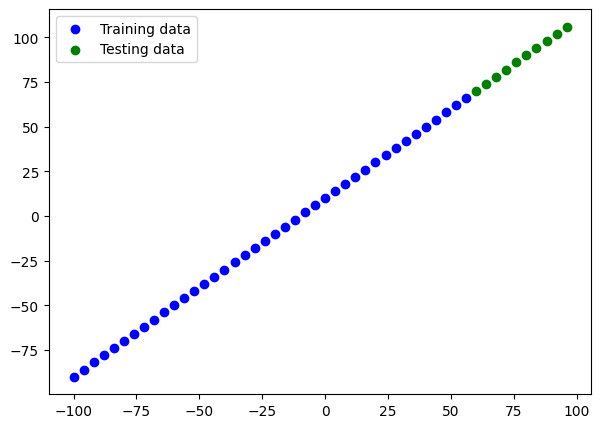

In [29]:
# Visualizing the data
plt.figure(figsize=(7, 5))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend()